<a href="https://colab.research.google.com/github/WasudeoGurjalwar/AL_ML_Training/blob/main/AICTE_FDP_K_Means_Clustering_Unsupervised_ML_Algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K-Means Clustering with Scikit-Learn
-----------------------------------------------------

<font color='green'><b>K-means clustering is one of the most widely used unsupervised machine learning algorithms that forms clusters of data based on the similarity between data instances.</b></font> For this particular algorithm to work, the number of clusters has to be defined beforehand. The **`K`** in the K-means refers to the <u>number of clusters</u>.

The K-means algorithm starts by randomly choosing a centroid value for each cluster. After that the algorithm iteratively performs three steps:

(i) Find the **`Euclidean distance`** between each data instance and centroids of all the clusters.

(ii) Assign the data instances to the cluster of the centroid with **`nearest distance`**.

(iii) Calculate **`new centroid values`** based on the mean values of the coordinates of all the data instances from the corresponding cluster.

A Simple Example
--------------------------
Let's try to see how the K-means algorithm works with the help of a handcrafted example, before implementing the algorithm in Scikit-Learn.

We have a set of the following two dimensional data instances named **`D`**.

In [ ]:
D = { (5,3), (10,15), (15,12), (24,10), (30,45), (85,70), (71,80), (60,78), (55,52), (80,91) }

# We want to divide this data into two clusters,
# C1 and C2 based on the similarity between the data points.

The first step is to randomly initialize values for the centroids of both clusters. Let's name centroids of clusters <font color='green'>C1 and C2 as c1 and c2</font> and initialize them with the values of the first two data points
i.e. (5, 3) and (10, 15).

![Iteration_1_K_means_algo](https://drive.google.com/uc?id=1uzb4HC6oxVimCvKjVOWL8r9rKMp1ycfW 'Iteration_1_K_means_algo')

After assigning data points to the corresponding clusters, the next step is to calculate the new centroid values. These values are calculated by finding the mean of the coordinates of the data points that belong to a particular cluster.

For cluster C1, there is currently only one point i.e. (5,3), therefore the mean of the coordinates remain same and the new centroid value for c1 will also be (5,3).

For C2, there are currently 9 data points. We name the coordinates of data points as x and y. The new value for x coordinate of centroid c2 can be calculated by determining the mean of x coordinates of all 9 points that belong to cluster C2 as given below:

<b>c2(x)</b> = (10 + 15 + 24 + 30 + 85 + 71 + 60 + 55 + 80) / 9 = 47.77  
The new value for y coordinate of centroid c2 can be calculated by determining the mean of all y coordinates of all 9 points that belong to cluster C2.

<b>c2(y)</b> = (15 + 12 + 10 + 45 + 70 + 80 + 78 + 52 + 91) / 9 = 50.33  

<font color='green'>The updated centroid value for c2 will now be <b>{47.77, 50.33}</b>.</font>

For the next iteration, the new centroid values for c1 and c2 will be used and the whole process will be repeated. The iterations continue until the centroid values stop updating.

![Iteration_2_K_means_algo](https://drive.google.com/uc?id=1uNw6RwkUbWuwteBV95yOnrg8slJnMc96 'Iteration_2_K_means_algo')

<b>c1(x)</b> = (5, 10, 15, 24) / 4 = 13.5   <br>
<b>c1(y)</b> = (3, 15, 12, 10) / 4 = 10.0   <br>
>Updated c1 to be (13.5, 10.0).

<b>c2(x)</b> = (30 + 85 + 71 + 60 + 55 + 80) / 6 = 63.5  <br>
<b>c2(y)</b> = (45 + 70 + 80 + 78 + 52 +91) / 6 = 69.33  <br>
> Updated c2 to be (63.5, 69.33).

![Iteration_3_K_means_algo](https://drive.google.com/uc?id=1g2TCXfMriBQkWD_WCeOhJRO1Eq6aN443 'Iteration_3_K_means_algo')

<b>c1(x)</b> = (5, 10, 15, 24, 30) / 5 = 16.8  <br>
<b>c1(y)</b> = (3, 15, 12, 10, 45) / 5 = 17.0  <br>
> Updated c1 to be (16.8, 17.0)

<b>c2(x)</b> = (85 + 71 + 60 + 55 + 80) / 5 = 70.2 <br>
<b>c2(y)</b> = (70 + 80 + 78 + 52 + 91) / 5 = 74.2 <br>
> Updated c2 to be (70.2, 74.2).

![Iteration_4_K_means_algo](https://drive.google.com/uc?id=1c7raBUh8KwdlFAO2Di18EYOcuIll65uB 'Iteration_4_K_means_algo')

At the end of fourth iteration, the updated values of C1 and C2 are same as they were at the end of the third iteration. This means that data cannot be clustered any further. c1 and c2 are the centroids for C1 and C2. To classify a new data point, the distance between the data point and the centroids of the clusters is calculated. Data point is assigned to the cluster whose centroid is closest to the data point.

K-means Clustering with Scikit-Learn
-----------------------------------------------------
Now that we know how the K-means clustering algorithm actually works, let's see how we can implement it with Scikit-Learn.

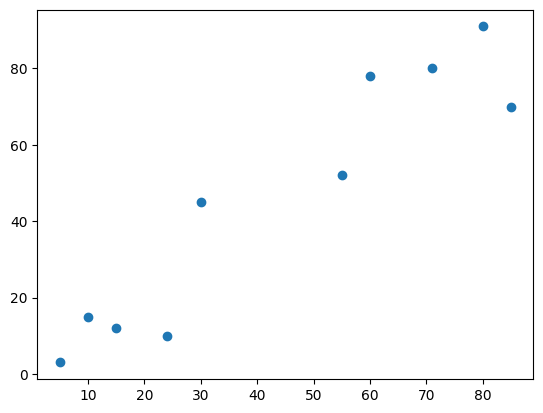

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans

# prepare the data that we want to cluster
X = np.array([[5,3],
     [10,15],
     [15,12],
     [24,10],
     [30,45],
     [85,70],
     [71,80],
     [60,78],
     [55,52],
     [80,91],])

# Visualize the Data
plt.scatter(X[:,0],X[:,1], label='True Position')
plt.show()

In [ ]:
# Create Clusters. Assume with no. of clusters = 2
kmeans = KMeans(n_clusters=2, n_init = 'auto')
kmeans.fit(X)

# see what centroid values the algorithm generated for the final clusters
print(kmeans.cluster_centers_)

[[16.8 17. ]
 [70.2 74.2]]


<font color='green'>Observation</font> : Here the first row contains values for the coordinates of the first centroid i.e. <b>(16.8 , 17)</b> and the second row contains values for the coordinates of the other centroid i.e. <b>(70.2, 74.2)</b>. You can see that these values are similar to what we calculated manually for centroids c1 and c2 in the last section.

In [ ]:
# To see the labels for the data point, execute the following script.
print(kmeans.labels_)

# The output is a one dimensional array of 10 elements corresponding
# to the clusters assigned to our 10 data points.

[0 0 0 0 0 1 1 1 1 1]


<font color='green'>Observation</font> : Here the first five points have been clustered together and the last five points have been clustered. Here 0 and 1 are merely used to represent cluster IDs and have no mathematical significance.

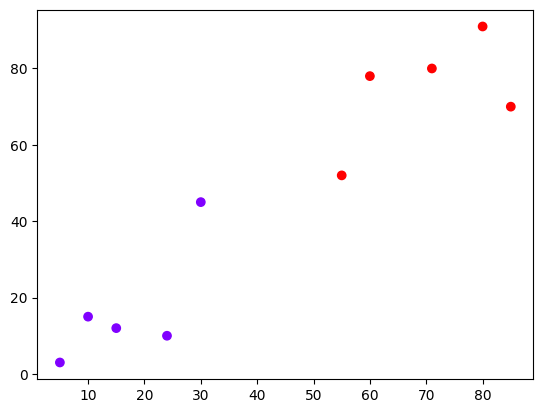

In [ ]:
# Let's plot the data points again on the graph and
# visualize how the data has been clustered.

plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')
# Here c parameter indicates color
# cmap means color map. There are some predefined color templates.

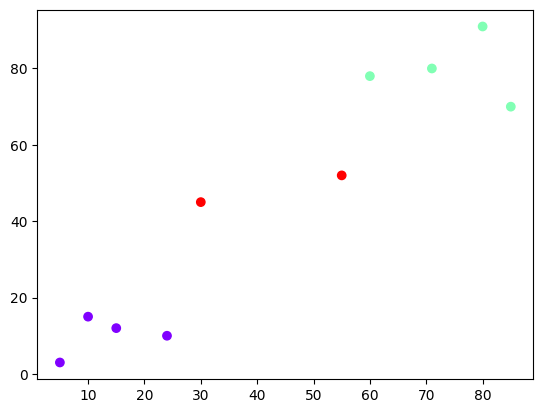

In [ ]:
# execute K-means algorithm with three clusters and see the output graph
kmeans = KMeans(n_clusters=3, n_init = 'auto')
kmeans.fit(X)

plt.scatter(X[:,0],X[:,1], c=kmeans.labels_ , cmap='rainbow');
# visualise the 3 clusters. Imagine 3 circles , one at lower left near origin having 4 points,
# second circle in center having 2 points and third circle having 4 points.

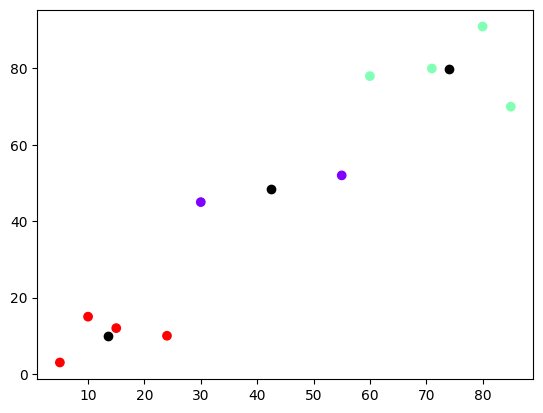

In [ ]:
# let's plot the points along with the centroid coordinates
# of each cluster to see how the centroid positions effects clustering.

plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[ : ,0] ,kmeans.cluster_centers_[ : ,1], color='black');

In [ ]:
print(kmeans.labels_) ## print the labels in 3 clusters
print(kmeans.cluster_centers_)

[0 0 0 0 2 1 1 1 2 1]
[[13.5  10.  ]
 [74.   79.75]
 [42.5  48.5 ]]


<font color='red'><b>Could you test for some new points ?</b></font>



In [ ]:
# lets define some test Points
Xtest = np.array([[4,5], [67,80]])

# use the above model kmeans with n_clusters = 3 to classify these points into correct cluster.
testClassification = kmeans.predict(Xtest)

testClassification

array([0, 1], dtype=int32)

<font color='green'><b>Observation :</b></font> Both the test points are classified to be in **Cluster 0**. See plot below where we have the **original points** , **centroid of each cluster** and the **test points** also.

<ipython-input-9-f7b6f27c41e0>:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:,0],X[:,1], cmap='rainbow')
<ipython-input-9-f7b6f27c41e0>:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(Xtest[:,0],Xtest[:,1], cmap='rainbow')


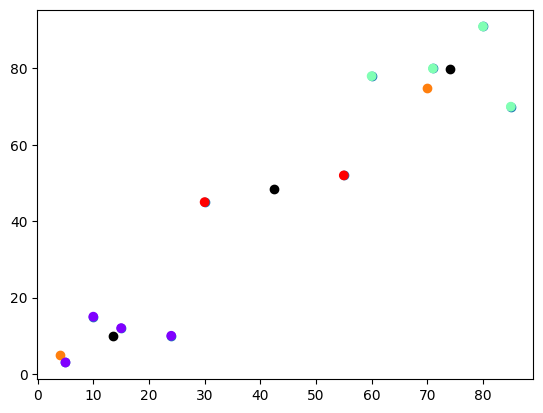

In [ ]:
# execute K-means algorithm with three clusters and see the above points correctly classified in respective clusters
kmeans = KMeans(n_clusters=3, n_init = 'auto')
kmeans.fit(X)

Xtest = np.array([[4,5], [70,75],])
kmeans.predict(Xtest)

# plotting the original points
plt.scatter(X[:,0],X[:,1], cmap='rainbow')

# plotting the test points into the correct cluster
plt.scatter(Xtest[:,0],Xtest[:,1], cmap='rainbow')

# plotting the centroid points
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black');

<font color='red'><b><h3><u>Case Study</u></h3></b></font>
**(follow hints & solve `within` 25 mins. Make sure of watching the video on `finding n_clusters using Elbow method` )**



In [ ]:
#  download the Mall_Customers dataset from the below link to your local PC
#  https://drive.google.com/open?id=1v9Ep1uXp7J-RXZVdm27r3fxstrqHgaa5

#-- uncomment & run the code

#--  Load the data set into your Colab NB

#from google.colab import files
#files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


{'Mall_Customers.csv': b'CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)\r\n1,Male,19,15,39\r\n2,Male,21,15,81\r\n3,Female,20,16,6\r\n4,Female,23,16,77\r\n5,Female,31,17,40\r\n6,Female,22,17,76\r\n7,Female,35,18,6\r\n8,Female,23,18,94\r\n9,Male,64,19,3\r\n10,Female,30,19,72\r\n11,Male,67,19,14\r\n12,Female,35,19,99\r\n13,Female,58,20,15\r\n14,Female,24,20,77\r\n15,Male,37,20,13\r\n16,Male,22,20,79\r\n17,Female,35,21,35\r\n18,Male,20,21,66\r\n19,Male,52,23,29\r\n20,Female,35,23,98\r\n21,Male,35,24,35\r\n22,Male,25,24,73\r\n23,Female,46,25,5\r\n24,Male,31,25,73\r\n25,Female,54,28,14\r\n26,Male,29,28,82\r\n27,Female,45,28,32\r\n28,Male,35,28,61\r\n29,Female,40,29,31\r\n30,Female,23,29,87\r\n31,Male,60,30,4\r\n32,Female,21,30,73\r\n33,Male,53,33,4\r\n34,Male,18,33,92\r\n35,Female,49,33,14\r\n36,Female,21,33,81\r\n37,Female,42,34,17\r\n38,Female,30,34,73\r\n39,Female,36,37,26\r\n40,Female,20,37,75\r\n41,Female,65,38,35\r\n42,Male,24,38,92\r\n43,Male,48,39,36\r\n44,Female,31,

**Context** : Above data set is created only for the learning purpose. It teaches you **how to segment customers**, also known as market basket analysis . I will demonstrate this by using unsupervised ML technique (KMeans Clustering Algorithm) in the simplest form.

**Content** : You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score. **Spending Score** is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

**Problem Statement** : You own a `small supermarket` and want to understand your customers like who can be `Target Customers` for a new chain of products you plan to launch. This would also help the marketing team to plan their strategy.

In [ ]:
# import the minimum required libraries
import numpy as np   # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # Data Visualization
import seaborn as sns  # Python library for Visualization

In [ ]:
#---- uncomment the code part & run

##-- Import the dataset

dataset = pd.read_csv('Mall_Customers.csv')


##-- Exploratory Data Analysis
##-- As this is unsupervised learning so Label (Output Column) is unknown

dataset.head(10)      # Printing first 10 rows of the dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [ ]:
#---- uncomment the code part & run
##-- Check the total rows and colums in the dataset
dataset.shape

(200, 5)

In [ ]:
#---- uncomment the code part & run
dataset.info()

##-- Did u observe this ?
##-- there are no missing values as all the columns has 200 entries properly

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
#---- uncomment the code part & run

##-- Check for Missing values ?

dataset.isnull().sum()

##-- Did u observe again ?
##-- there are no missing values.

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
#---- uncomment the code part & run

##-- Feature selection for the model
##-- Considering only 2 features (Annual income and Spending Score) and no Label available

X = dataset.iloc[:, [3,4]].values
X[ : 5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]])

**Building the Model** <br>
The tricky part in KMeans Algorithm is to find rigth **`n_clusters`**. The best method to find n_clusters is using **`Elbow`** method.

<h3>Quick watch this <b>Using Elbow method for finding n_clusters</b></h3>

<a href="https://drive.google.com/open?id=1yFSml64X21ZAPec0jr2BLqVkxJuhWXIq">
  <img src="https://drive.google.com/uc?id=14OOsd0HaKoMJjqu5YT5n7-HsvE6UVV7z" alt="Elbow method for finding n_clusters" width="130" height="70">
</a>

<small><b>This Video would give you a fare idea on <u>What will we</u> code in next cell</b><small><br>
<small>Credits : This video is recorded by 365 Data Science team members.</small>


In [ ]:
# Building the Model
# the tricky part in KMeans Algorithm is to find rigth => n_clusters.
# The best method to find n_clusters is using Elbow method

# To decide the optimum cluster number use ELBOW Method

# -- run the below code

from sklearn.cluster import KMeans
wcss=[]   # wcss means with-in clusters Sum of Squares

# we always assume the max number of cluster would be 10
# you can judge the number of clusters by doing averaging

# Watch the video above and type your code to get wcss for n_clusters from 1 to 10
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, n_init = 'auto', max_iter=300, random_state=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

print(wcss)
# inertia_ is the formula used to segregate the data points into clusters

[269981.28000000014, 184609.98434090626, 106348.37306211119, 73880.64496247198, 44448.45544793369, 37265.86520484345, 31632.259809473468, 25038.836208685145, 23337.407053782088]


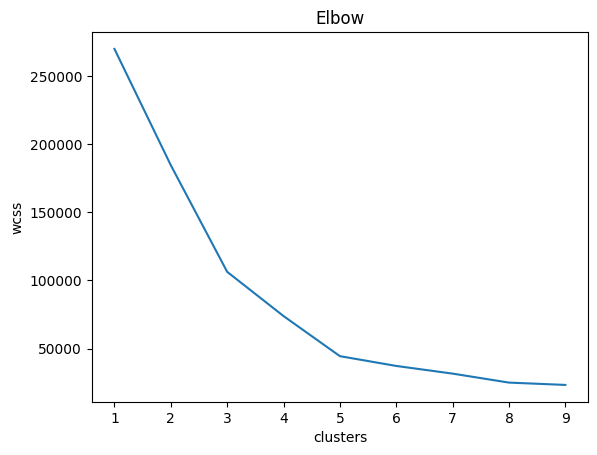

In [ ]:
## -- Type your code according to the above Video and below comments.

# plot the wcss vs. n_clusters to Visualize the ELBOW
# This way we would get the optimal value of K
plt.plot(range(1,10), wcss)
plt.title('Elbow')
plt.xlabel('clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
# If you zoom out this curve then you will see that last elbow comes at k=5
# no matter what range we select for example (1,21) also u will see the same behaviour
# but if we chose higher range it is little difficult to visualize the ELBOW.
# that is why we usually prefer range (1,11)
# Finally we got that k=5

## -- Just run the below code

# Model Build
kmeansmodel = KMeans(n_clusters= 5, random_state=0, n_init= 'auto')
y_kmeans= kmeansmodel.fit_predict(X)

# y_kmeans is the final model .
# Now how and where we will deploy this model in production depends on what tool we are using.
# This use case is very common and it is used in "BFS industry(credit card)"
# and retail for "Customer Segmentation".

# BFS -> Banking & Finance Sector

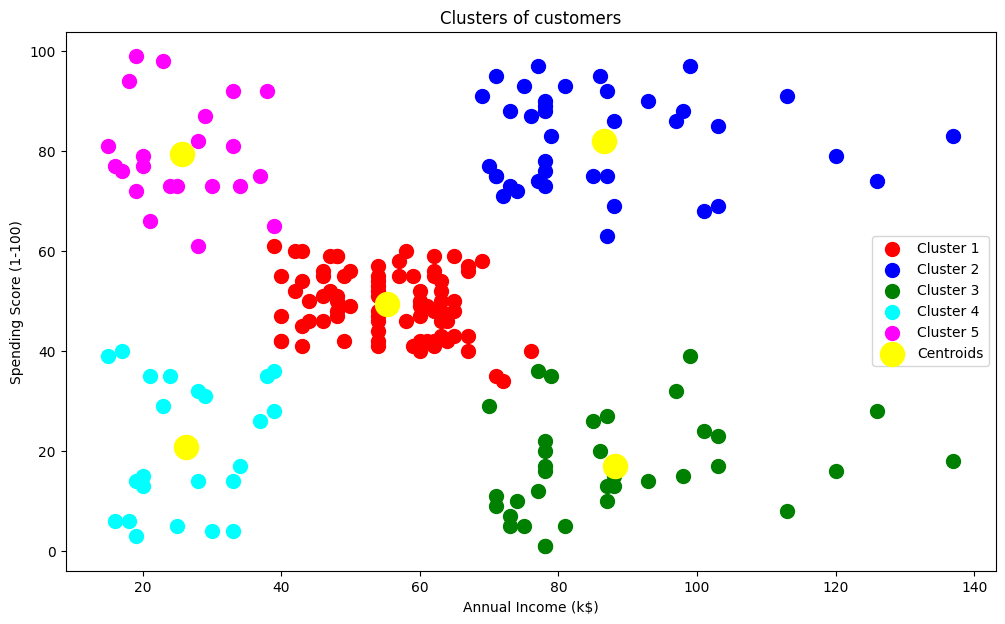

In [ ]:
## -- Just run the below code

# Visualizing all the clusters
plt.figure(figsize=(12,7))

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

<font color='green'><b>Model Interpretation</b></font> :

**Cluster 1 (Red Color)** -> mid level earning and mid-spending <br>

**Cluster 2 (Blue Color)** -> low earners and high spenders <br>

**Cluster 3 (Green Color)** -> earning high and also spending high **[TARGET SET]**

**Cluster 4 (cyan Color)** -> earning less ,  spending less

**Cluster 5 (magenta Color)** -> Earning more , spending less

<hr>
<font color='green'><b>Outcome of the Analysis : </b></font><br>
We can put Cluster 3 into some alerting system where email can be send to them on daily basis as these <b>Target Customers</b> can easily be convinced to buy newer brand products. <b>Wherein others we can set like once in a week or once in a month. </b>


<hr>
<h3><font color='green'>You have coded and found the best value of n_clusters and segmented the Customers for your <b>Supermarket</b>.

</h3>
<hr>

<font color='green'><b>Thank you for going through the Notebook. I am sure it was a fruitful learning exprience. </b></font>

**You think you have query or a thought in Data Science or Machine learning** , for solving some real problems, you are welcome to connect / message on Linkedin with the author of this Notebook. ( <small> https://linkedin.com/in/rocky-jagtiani-3b390649/ </small> )
